In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import cv2
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

Using TensorFlow backend.


In [ ]:
# Load data
!wget 'https://drive.google.com/file/d/166rB0eODDTdgY3-bcuBj4pR3PGhguwv_/view?usp=sharing' -O shopee-product-detection-dataset.zip

--2020-06-21 09:17:22--  https://drive.google.com/file/d/166rB0eODDTdgY3-bcuBj4pR3PGhguwv_/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 108.177.111.101, 108.177.111.138, 108.177.111.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.111.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘shopee-product-detection-dataset.zip’

shopee-product-dete     [ <=>                ]  68.81K  --.-KB/s    in 0.002s  

2020-06-21 09:17:23 (31.9 MB/s) - ‘shopee-product-detection-dataset.zip’ saved [70461]



In [ ]:
# Direktori Setiap data
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors'
paper = os.listdir('/tmp/rockpaperscissors/paper/')
rock = os.listdir('/tmp/rockpaperscissors/rock/')
scissors = os.listdir('/tmp/rockpaperscissors/scissors/')

In [ ]:
data = []
labels = []

for i in paper:
    try:

      image = cv2.imread('/tmp/rockpaperscissors/paper/'+i)
      image_array = Image.fromarray(image, 'RGB')
      resize_image = image_array.resize((150, 150))
      data.append(np.array(resize_image))
      label = to_categorical(0, num_classes=3)
      labels.append(label)

    except AttributeError:
      print('none')


for u in rock:
    try:

      image = cv2.imread('/tmp/rockpaperscissors/rock/'+u)
      image_array = Image.fromarray(image, 'RGB')
      resize_image = image_array.resize((150, 150))
      data.append(np.array(resize_image))
      label = to_categorical(1, num_classes=3)
      labels.append(label)

    except AttributeError:
      print('none2')


for z in scissors:
    try:

      image = cv2.imread('/tmp/rockpaperscissors/scissors/'+z)
      image_array = Image.fromarray(image, 'RGB')
      resize_image = image_array.resize((150, 150))
      data.append(np.array(resize_image))
      label = to_categorical(2, num_classes=3)
      labels.append(label)

    except AttributeError:
      print('none3')

In [ ]:
image_data = np.array(data)
labels = np.array(labels)

In [ ]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2,
                                                    random_state = 100)

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1/255.)

In [ ]:
train_generator = train_datagen.flow(
        x_train,
        y_train,  
        batch_size=32)
 
validation_generator = test_datagen.flow(
        x_test,
        y_test, 
        batch_size=32)


In [ ]:
from keras import backend as K
def buatCNN(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [ ]:
#instantiate the model
height = 150
width = 150
classes = 3
channels = 3
model = buatCNN(height = height, width = width, classes = classes, 
                 channels = channels)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 74, 74, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 36, 36, 32)       

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adamax', metrics = ['accuracy'])

In [ ]:
#fit the model onto the dataset
h = model.fit(train_generator, 
              steps_per_epoch=150,
              epochs = 10,
              validation_data=validation_generator, # menampilkan akurasi pengujian data validasi 
              verbose=1)

Epoch 1/10
150/150 [==============================] - 97s 649ms/step - loss: 0.5349 - accuracy: 0.8501 - val_loss: 5.5431 - val_accuracy: 0.3607
Epoch 2/10
150/150 [==============================] - 96s 637ms/step - loss: 0.1652 - accuracy: 0.9464 - val_loss: 4.2894 - val_accuracy: 0.3699
Epoch 3/10
150/150 [==============================] - 95s 633ms/step - loss: 0.1004 - accuracy: 0.9662 - val_loss: 1.5913 - val_accuracy: 0.6233
Epoch 4/10
150/150 [==============================] - 95s 634ms/step - loss: 0.0854 - accuracy: 0.9730 - val_loss: 0.2430 - val_accuracy: 0.9041
Epoch 5/10
150/150 [==============================] - 96s 639ms/step - loss: 0.0643 - accuracy: 0.9797 - val_loss: 0.0722 - val_accuracy: 0.9612
Epoch 6/10
150/150 [==============================] - 95s 635ms/step - loss: 0.0358 - accuracy: 0.9864 - val_loss: 0.0021 - val_accuracy: 0.9863
Epoch 7/10
150/150 [==============================] - 96s 639ms/step - loss: 0.0454 - accuracy: 0.9853 - val_loss: 0.0882 - val_ac

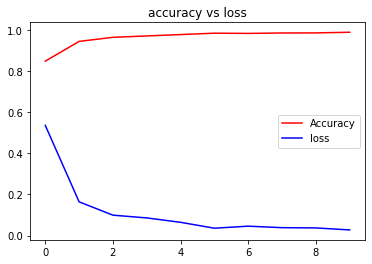

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = h.history['accuracy']
loss = h.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Accuracy')
plt.plot(epochs, loss, 'b', label='loss')
plt.title('accuracy vs loss')
plt.legend(loc=0)
plt.figure()


plt.show()

Saving IMG20200513193724[1].jpg to IMG20200513193724[1].jpg
IMG20200513193724[1].jpg
Paper


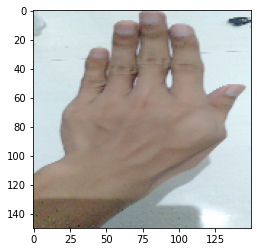

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  images = test_datagen.flow(images,batch_size=32)
  classes = model.predict_generator(images,steps=1)
  classes = np.around(classes)
  new_class = list(classes)
  new_class = new_class[0]
  print(fn)
  
  if new_class[0] == 1:
    print('Paper')
  elif new_class[1] == 1:
    print('Rock')
  else:
    print('Scissors') 